# <span style="color:RoyalBlue">ANÁLISIS PREDICTIVO DE LA INFLACIÓN Y LOS BONOS 10Y ENTRE PAÍSES (2010-2024)</span> 

---

**Autor:** <span style="color:SteelBlue"> Hesham Gaber</span>    
**Centro:**<span style="color:SteelBlue"> Ironhack</span>    
**Curso:**<span style="color:SteelBlue"> Data Analytics</span>    
**Año:**<span style="color:SteelBlue"> 2025</span>     

---

### ÍNDICE
1. [Introducción](#Introducción)
2. [Objetivos](#Objetivos)
3. [Metodología](#Metodología)
4. [Paquetes](#Paquetes-usados-en-el-análisis)
5. [Lectura de datos](#Lectura-de-bases-de-datos)
6. [Limpieza de datos](#Limpieza-de-los-datos)       
   [1. Comprobación de tipos de columnas](#1.-Comprobación-de-tipos-de-columnas)    
   [2. Revisión y manejo de valores faltantes](#2.-Revisión-y-manejo-de-valores-faltantes)       
7. [Análisis Exploratorio](#Análisis-Exploratorio)   
   [1. Estadísticas descriptivas](#1.-Estadísticas-descriptivas)     
   [2. Distribuciones de variables](#2.-Distribución-de-inflación-y-rendimientos-de-bonos-10Y)     
   [3. Tendencias temporales por país](#3.-Tendencias-temporales-por-país)     
   [4. Correlación entre las variables](#4.-Correlación-entre-inflación-y-rendimiento-de-los-bonos-a-10-años)     
   [5. Detección de outliers](#5.-Detección-de-outliers)     
   [6. Creación de variable objetivo](#6.-Creación-del-Investment-Score)
8. [Modelos de Predicción y Evaluación de la variable objetivo](#Modelos-de-Predicción-y-Evaluación-del-Investment-Score)       
   [1. Árboles de Decisión y Random Forest](#2.-Árboles-de-Decisión-y-Random-Forest)       
   [2. Modelos de Series Temporales](#3.-Modelos-de-Series-Temporales)
   - [2.1. Modelo ARIMA (por país)](#3.1-Modelo-ARIMA-(por-país))
   - [2.2. Modelo VAR (Vector Autoregresivo)](#3.2.-Modelo-VAR-(Vector-Autoregresivo))   
   
   [3. Validación de Modelos & Ranking de países](#4.-Validación-de-Modelos-&-Ranking-de-países)         
9. [Resultados](#Resultados)  
10. [Conclusión](#Conclusión)
11. [Recursos](#Recursos)
   

---


## <span style="color:SteelBlue">Introducción</span>
En un entorno económico globalizado, la **inflación y los rendimientos de los bonos soberanos** son indicadores clave para evaluar la salud económica y el atractivo de inversión de cada país. La inflación refleja la variación de los precios en una economía y afecta directamente el poder adquisitivo y la rentabilidad de los activos financieros. Por su parte, los rendimientos de los bonos a 10 años (10Y) proporcionan información sobre las expectativas de los inversores respecto a la estabilidad económica y las tasas de interés a largo plazo.

El presente **análisis comparativo** abarca el período **2010-2024** e integra datos de inflación y rendimientos de bonos de diversos países. El objetivo es **identificar patrones, diferencias significativas y oportunidades de inversión**, así como proporcionar una base para **proyecciones y predicciones futuras**. Este enfoque permite a los inversores y analistas comprender mejor el **riesgo y la rentabilidad relativa** entre países, optimizando la toma de decisiones financieras internacionales.

## <span style="color:SteelBlue">Objetivos</span>

### Objetivo general
Analizar la relación entre inflación y bonos a 10 años en distintos países, para identificar los países con mejores oportunidades de inversión. 

### Objetivos específicos
1. Explorar tendencias de inflación y bonos en USA, Alemania, Reino Unido, Japón y España, incluyendo eventos clave como COVID‑19 o shocks inflacionarios.
2. Predecir la relación inflación–bonos con modelos econométricos y de Machine Learning.
3. Comparar resultados entre países y generar un ranking de inversión según rentabilidad, estabilidad y precisión.

## <span style="color:SteelBlue">Metodología</span>

Para este análisis comparativo se siguieron los siguientes criterios:

1. **Selección de países y periodo de estudio**:  
   Se consideraron cinco países representativos: USA, Alemania, Reino Unido, Japón y España. El período analizado abarca desde 2010 hasta 2024, ya que para 2025 solo se dispone de información parcial de los rendimientos de bonos a 10 años y no hay datos completos de inflación. Todos los datos de cada año corresponden a diciembre.
   

2. **Recolección de datos**:  
   - **Inflación**: Se obtuvieron los datos de inflación anual de Kaggle (https://www.kaggle.com/datasets/everget/government-bonds/data) .  
   - **Bonos a 10 años (10Y)**: Los rendimientos de los bonos soberanos a 10 años se recopilaron de World Government Bonds (https://www.worldgovernmentbonds.com/?utm_source=chatgpt.com#google_vignette)

3. **Organización de los datos**:  
   - Todos los datos fueron consolidados en dos archivos CSV con las siguientes columnas: 
     - Archivo de inflacion: `country`, `year`, `inflation`.
     - Archivo de yield:`country`, `year`,`10Y_bond_yield`. 
   - Se garantizó que cada fila representara los valores al cierre del año correspondiente (diciembre).
   
---


## <span style="color:SteelBlue">Paquetes usados en el análisis</span>

In [145]:
# Standard library imports
import os
import re
import warnings
from math import sqrt
from pathlib import Path

# Data science and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle


# Scientific computing
from scipy import stats

# Statistics and econometrics
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Machine learning
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from scipy.stats import t as student_t
from sklearn.tree import DecisionTreeRegressor, plot_tree
from statsmodels.tsa.arima.model import ARIMA

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

## <span style="color:SteelBlue">Lectura de bases de datos</span>

El primer paso consiste en localizar los directorios donde se encuentran las bases de datos, para poder acceder a ellos correctamente en el análisis. Para mayor claridad, se utilizarán los siguientes nombres de referencia:

- El directorio de la base de datos sobre inflación se definirá como **`inflation_path`**.  
- El directorio de la base de datos sobre los rendimientos de bonos a 10 años se definirá como **`bond_yield_path`**.  

In [6]:
# Path de la bases de datos
inflation_path = "/Users/heshamelsharkawy/Desktop/G_b_A/Notebook_nuevo/world_bank_data.csv"
bond_yield_path = "/Users/heshamelsharkawy/Desktop/G_b_A/Notebook_nuevo/10Y_Bond_Yields.csv"

Una vez definidos los directorios, se procede a realizar la lectura de las mismas donde:
- La base de datos de inflacion recibirá el nombre de **`df_inflation`**.
- La base de datos de rendimientos de bonos a 10 años recibirá el nombre de **`df_bond_yield`**.

In [11]:
# Lectura de las bases de datos
df_inflation = pd.read_csv(inflation_path)
df_bond_yield = pd.read_csv(bond_yield_path)

In [12]:
# Visualización de la base de datos de inflación por pais y año
df_inflation.head()

,country,country_id,year,inflation,GDP (Current USD),GDP per Capita (Current USD),Unemployment Rate (%),"Interest Rate (Real, %)","Inflation (GDP Deflator, %)",GDP Growth (% Annual),Current Account Balance (% GDP),Government Expense (% of GDP),Government Revenue (% of GDP),Tax Revenue (% of GDP),Gross National Income (USD),Public Debt (% of GDP)
0,Aruba,aw,2010,2.078141,2.453597e+09,24093.14015,NaN,11.666131,-1.223407,-2.733457,-18.752537,NaN,NaN,NaN,2.313385e+09,NaN
1,Aruba,aw,2011,4.316297,2.637859e+09,25712.38430,NaN,4.801974,4.005674,3.369237,-9.877656,NaN,NaN,NaN,2.391841e+09,NaN
2,Aruba,aw,2012,0.627472,2.615208e+09,25119.66554,NaN,8.200875,0.184033,-1.040800,3.473451,NaN,NaN,NaN,2.499118e+09,NaN
3,Aruba,aw,2013,-2.372065,2.727850e+09,25813.57673,NaN,10.709709,-1.995948,6.431483,-11.813206,NaN,NaN,NaN,2.563517e+09,NaN
4,Aruba,aw,2014,0.421441,2.790850e+09,26129.83906,NaN,3.213869,3.958897,-1.586575,-4.658577,NaN,NaN,NaN,2.688102e+09,NaN


In [13]:
# Visualización de la base de datos de rendimientos de bonos a 10 años por pais y año
df_bond_yield.head()

,country,year,10Y_bond_yield
0,Switzerland,2025,0.267
1,Switzerland,2024,0.287
2,Switzerland,2023,0.651
3,Switzerland,2022,1.570
4,Switzerland,2021,-0.163


En la base de datos de **inflación** se observa la presencia de múltiples variables económicas, entre ellas:  

- **`country`**: país de interés.  
- **`year`**: año de referencia del estudio.
- **`inflation`**: inflación.
- **`GDP (Current USD)`** → PIB en dólares corrientes.  
- **`GDP per Capita`** → PIB per cápita.  
- **`GDP Growth (% Annual)`** → Crecimiento anual del PIB.  
- **`Unemployment Rate`** → Tasa de desempleo.  
- **`Real Interest Rate`** → Tasa de interés real (ajustada por inflación).  
- **`Public Debt (% of GDP)`** → Deuda pública (% del PIB).  
- **`Government Expense and Revenue`** → Gastos e ingresos del gobierno.  
- **`Current Account Balance`** → Balanza por cuenta corriente.  
- **`Gross National Income (GNI)`** → Ingreso Nacional Bruto.  
- **`Tax Revenue`** → Ingresos tributarios.  

En la base de datos de **rendimientos de bonos a 10 años** se encuentran las siguientes variables:  

- **`country`**: país de interés.  
- **`year`**: año de referencia del estudio.  
- **`10Y_bond_yield`**: rendimiento del bono soberano a 10 años.  

Dado que en este estudio el objetivo es analizar la **relación entre inflación y rendimientos de bonos a 10 años** en cada país a lo largo del tiempo, únicamente se conservarán las variables relevantes para dicho análisis (`country`, `year`, `Inflation`, `10Y_bond_yield`).  

El resto de las columnas se eliminarán para simplificar la base de datos y centrar el análisis en los indicadores de interés.  

## <span style="color:SteelBlue">Limpieza de los datos</span> 

Tras una primera visualización general de la información, el siguiente paso consiste en **unificar las dos bases de datos** (inflación y bonos a 10 años) y **eliminar las variables que no son relevantes para el estudio**.  

De este modo, el conjunto de datos quedará reducido únicamente a las columnas necesarias para el análisis: `country`, `year`, `Inflation` y `10Y_bond_yield`.  

In [15]:
# Seleccionar solo las columnas de interés
df_inflation = df_inflation[["country", "year", "inflation"]]
df_bond_yield= df_bond_yield[["country", "year", "10Y_bond_yield"]]

In [23]:
# Unificar las bases de datos por país y año
df_merged = pd.merge(
    df_inflation,
    df_bond_yield,
    on=["country", "year"],
    how="inner"   # solo mantiene los registros comunes
)

In [24]:
# Visualizar la nueva base de datos
print(df_merged)

           country  year  inflation  10Y_bond_yield
0      Switzerland  2015  -1.143909          -0.069
1      Switzerland  2016  -0.434619          -0.139
2      Switzerland  2017   0.533788          -0.069
3      Switzerland  2018   0.936335          -0.168
4      Switzerland  2019   0.362886          -0.502
..             ...   ...        ...             ...
114  United States  2021   4.697859           1.512
115  United States  2022   8.002800           3.879
116  United States  2023   4.116338           3.866
117  United States  2024   2.949525           4.581
118  United States  2025        NaN           4.060

[119 rows x 4 columns]


El nuevo conjunto de datos unificado se denominó **`df_merged`**.

### Verificación y corrección de tipos de datos

Antes de comenzar el análisis, es importante asegurarse de que todas las columnas tengan el tipo de dato adecuado. Para ello se realizaron los siguientes pasos:

### 1. **Comprobación de tipos de columnas**


In [30]:
# Revisar los tipos de datos
print(df_merged.dtypes)

country            object
year                int64
inflation         float64
10Y_bond_yield    float64
dtype: object


- `country` → **object** (texto), adecuado para identificar cada país.  
- `year` → **int64** (entero), correcto para manejar los años como valores numéricos o series temporales.  
- `inflation` → **float64** (decimal), apropiado para cálculos y gráficas.  
- `10Y_bond_yield` → **float64** (decimal), también correcto para análisis numérico.

Esto indica que los tipos de datos son **adecuados** para el análisis, sin necesidad de conversiones adicionales.  


### 2. **Revisión y manejo de valores faltantes**

Para garantizar la calidad de los datos en la base **`df_merged`**, se realizó un análisis de valores faltantes.  

- Se verifica cada columna para detectar registros con datos ausentes (`NaN`).  
- Para cada valor faltante se registra el **país** y el **año** correspondiente, de manera que se pueda identificar exactamente dónde faltan datos.  

In [33]:
# Crear una lista para guardar los registros con valores faltantes
missing_records = []

# Iterar sobre cada columna
for col in df_merged.columns:
    # Saltar la columna 'country' si quieres enfocarte solo en numéricas
    if col not in ['country', 'year']:
        # Filtrar filas con NaN en la columna
        missing_rows = df_merged[df_merged[col].isna()]
        for idx, row in missing_rows.iterrows():
            missing_records.append({
                "Column": col,
                "Country": row["country"],
                "Year": row["year"]
            })

# Convertir a DataFrame para mostrar como tabla
missing_table = pd.DataFrame(missing_records)

# Mostrar tabla ordenada
print(missing_table)

      Column         Country  Year
0  inflation     Switzerland  2025
1  inflation           China  2025
2  inflation         Germany  2025
3  inflation           Spain  2025
4  inflation  United Kingdom  2025
5  inflation           Italy  2025
6  inflation           Japan  2025
7  inflation          Mexico  2025
8  inflation   United States  2025


Dado que para el año 2025 los datos de inflación aún no están disponibles y los rendimientos de bonos solo incluyen hasta septiembre, se decidió **eliminar todas las filas correspondientes a 2025**.  

Esto asegura que el análisis se realice únicamente con **datos completos y consistentes**, abarcando los años 2010 a 2024.

In [34]:
# Eliminar las filas del año 2025
df_data = df_merged[df_merged["year"] != 2025]

In [35]:
# Revisar resultado
print(df_data.tail())

           country  year  inflation  10Y_bond_yield
113  United States  2020   1.233584           0.917
114  United States  2021   4.697859           1.512
115  United States  2022   8.002800           3.879
116  United States  2023   4.116338           3.866
117  United States  2024   2.949525           4.581


El conjunto de datos limpio y unificado se denomina ahora **`df_data`**, que servirá como base principal para el análisis comparativo.

## <span style="color:SteelBlue">Análisis Exploratorio</span>

El análisis exploratorio nos permite **comprender la distribución y comportamiento de las variables** antes de realizar análisis más avanzados o modelos predictivos.  

### 1. Estadísticas descriptivas

Se obtienen medidas básicas como media, mediana, desviación estándar, mínimo y máximo para cada variable numérica, excepto año, porque realmente es de tipo fecha, no entero o decimal. 


In [41]:
# Estadísticas descriptivas (excluyendo 'year')
numeric_cols = ['inflation', '10Y_bond_yield']  # columnas numéricas reales

# Función para estadísticas descriptivas
def descriptive_stats(df, numeric_cols):
    stats = df[numeric_cols].describe()
    return stats

descriptive_stats(df_data, numeric_cols)

,inflation,10Y_bond_yield
count,110.000000,110.000000
mean,2.199738,2.376664
std,2.083245,2.340356
min,-1.143909,-0.576000
25%,0.823158,0.582250
50%,1.775157,1.878500
75%,2.883183,3.253250
max,8.390576,10.840000


**Interpretación:**

- **Inflación (`inflation`)**
  - El valor medio es **2.20%**, con una desviación estándar de **2.08%**, lo que indica cierta variabilidad entre países y años.  
  - Se observan valores negativos mínimos (-1.14%), reflejando periodos de deflación, y un máximo de 8.39%, probablemente debido a shocks inflacionarios.  
  - La mediana (1.78%) es menor que la media, lo que sugiere una **distribución ligeramente sesgada a la derecha**.

- **Rendimientos de bonos 10 años (`10Y_bond_yield`)** 
  - El valor medio es **2.38%**, con una desviación estándar de **2.34%**, mostrando también variabilidad significativa.  
  - Valores mínimos negativos (-0.58%) se deben a tasas negativas en algunos países (por ejemplo, Suiza o Alemania en ciertos años).  
  - El máximo es **10.84%**, indicando bonos de países con mayor riesgo o economías emergentes.  
  - La mediana (1.88%) es ligeramente menor que la media, indicando también un sesgo a la derecha.

En general, ambos indicadores muestran **diferencias importantes entre países y periodos**, lo que justifica realizar un análisis comparativo país por país y estudiar la relación entre inflación y rendimiento de bonos a 10 años.

### 2. Distribución de inflación y rendimientos de bonos 10Y

La distribución de una variable muestra cómo se **reparten sus valores** a lo largo del rango posible, lo que permite identificar tendencias, patrones y valores atípicos.

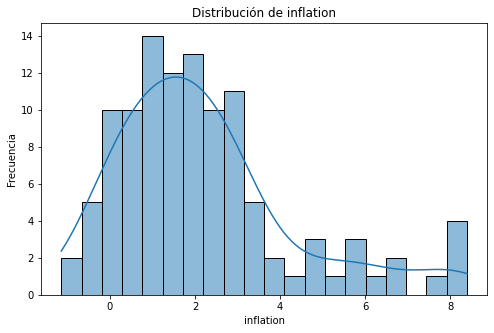

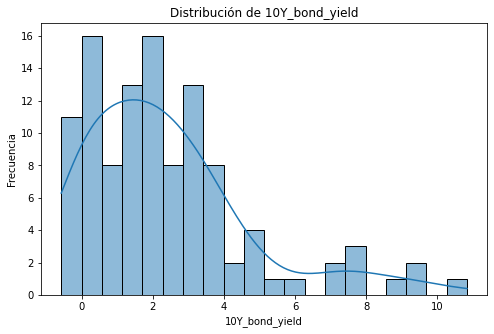

In [45]:
# Distribución de variables
    
# Función para graficar distribuciones
def plot_distributions(df, columns, bins=20):
    for col in columns:
        plt.figure(figsize=(8,5))
        sns.histplot(df[col], bins=bins, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.show()

plot_distributions(df_data, numeric_cols)

**Interpretación:**

Se crearon histogramas para observar la distribución de las variables `inflation` y `10Y_bond_yield`.

- **Inflación (`inflation`)**
  - La mayoría de los valores se concentran entre **0% y 3%**, mostrando que la mayoría de los países tienen niveles moderados de inflación.
  - Hay algunos **valores extremos** superiores a 5% y valores negativos, que corresponden a periodos de alta inflación o deflación, respectivamente.
  - La forma del histograma sugiere un **sesgo a la derecha**: la cola derecha es más larga debido a los valores altos de inflación en ciertos años o países.

- **Rendimientos de bonos a 10 años (`10Y_bond_yield`)**
  - La mayoría de los bonos se encuentran entre **0% y 4%**, reflejando tasas bajas en países desarrollados.
  - Algunos valores muy altos (cercanos a 10%) corresponden a bonos de economías emergentes o de mayor riesgo.
  - También se observa un **sesgo a la derecha**, con la cola del histograma extendiéndose hacia los valores más altos de rendimiento.

**Conclusión:**
- Ambos histogramas muestran **concentración de la mayoría de los datos en rangos moderados**, pero con **colas hacia valores extremos**, indicando la presencia de outliers.
- Esto sugiere que, al analizar la relación entre inflación y bonos, es importante tener en cuenta estas diferencias entre países y posibles valores atípicos que podrían afectar medidas como la media.

### 3. Tendencias temporales por país

Se analiza cómo evolucionan la inflación y los bonos a 10 años a lo largo del tiempo para cada país.

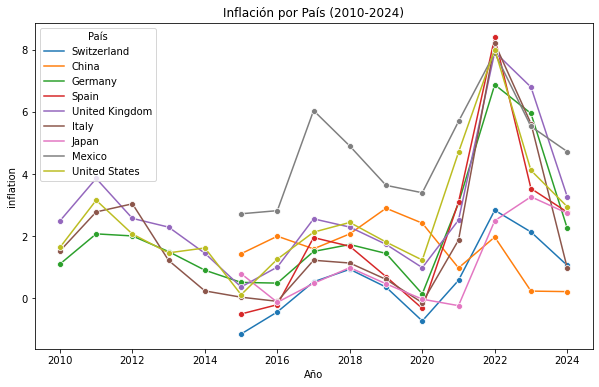

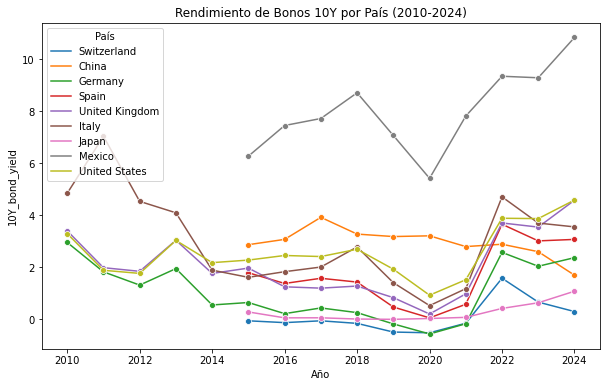

In [46]:
# Función para series/tendencias temporales por país
def plot_time_series(df, y_col, title):
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x='year', y=y_col, hue='country', marker='o')
    plt.title(title)
    plt.xlabel('Año')
    plt.ylabel(y_col)
    plt.legend(title='País')
    plt.show()
    
plot_time_series(df_data, 'inflation', 'Inflación por País (2010-2024)')
plot_time_series(df_data, '10Y_bond_yield', 'Rendimiento de Bonos 10Y por País (2010-2024)')

**Interpretación de los gráficos:**

- **Inflación:**  
  - Entre 2010 y 2020, la mayoría de los países mantuvieron niveles de inflación relativamente estables, reflejo de políticas monetarias acomodaticias y baja presión de demanda.
  - A partir de 2021–2022, se observa un salto abrupto en la inflación en casi todas las economías analizadas, destacando EE.UU., Reino Unido y México.
    Este repunte coincide con:
     - La salida de la pandemia.
     - Estímulos fiscales masivos.
     - Problemas en las cadenas de suministro.
     - Aumento de precios energéticos y geopolítica (como la guerra en Ucrania).
     
  - Países como EE.UU., Reino Unido y México muestran picos más pronunciados, mientras que Suiza y Japón mantienen niveles bajos, reflejando enfoques monetarios más conservadores.

- **Rendimientos de bonos 10 años:**  
  - Países con mayor inflación como EE.UU. y Reino Unido muestran fluctuaciones más marcadas, especialmente tras 2020.
  - Japón y Suiza destacan por su estabilidad prolongada, con rendimientos bajos que reflejan políticas de tipos negativos o cercanos a cero, lo que indica políticas monetarias ultra acomodaticias y baja presión inflacionaria.
  - El aumento de rendimientos en 2022–2023 sugiere un endurecimiento monetario global frente a la inflación.
 

**Conclusión:**  
- La inflación descontrolada obliga a los países a ajustar sus políticas monetarias, y eso se refleja directamente en el mercado de bonos.
- También nos permite comparar cómo cada país responde a las crisis económicas: algunos con medidas fuertes (como EE.UU. y Reino Unido), otros con más cautela (como Japón y Suiza).

### 4. Correlación entre inflación y rendimiento de los bonos a 10 años

Para entender cómo se relacionan las variables, se realizan:

- **Matrices de correlación**: muestran el grado de relación lineal entre variables numéricas.
- **Scatter plots**: permiten visualizar la relación entre dos variables, incluyendo posibles outliers.
- **Heatmaps**: representan gráficamente la matriz de correlación, facilitando la interpretación de tendencias.

Matriz de correlación:
                 inflation  10Y_bond_yield
inflation        1.000000        0.606217
10Y_bond_yield   0.606217        1.000000


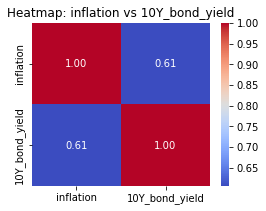

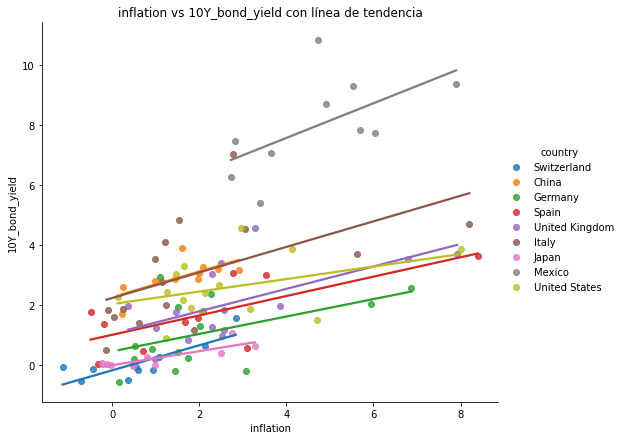

,inflation,10Y_bond_yield
inflation,1.000000,0.606217
10Y_bond_yield,0.606217,1.000000


In [71]:
# Función para la correlacion entre inflacion y bonos

def plot_correlation_with_trend_and_heatmap(df, col_x, col_y):
    """
    Calcula la correlación entre dos columnas, muestra un scatter plot
    con línea de tendencia y un heatmap de correlación.
    
    Parámetros:
    df : DataFrame
    col_x : nombre de la primera columna
    col_y : nombre de la segunda columna
    """
    # 1. Matriz de correlación
    correlation = df[[col_x, col_y]].corr()
    print("Matriz de correlación:\n", correlation)
    
    # 2. Heatmap
    plt.figure(figsize=(4,3))
    sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f'Heatmap: {col_x} vs {col_y}')
    plt.show()
    
    # 3. Scatter plot con línea de tendencia
    sns.lmplot(
        data=df, x=col_x, y=col_y, hue='country', height=6, aspect=1.2, markers='o', ci=None
    )
    plt.title(f'{col_x} vs {col_y} con línea de tendencia')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.show()
    
    return correlation

plot_correlation_with_trend_and_heatmap(df_data, 'inflation', '10Y_bond_yield')

**Interpretación:**

- La correlación entre `inflation` y `10Y_bond_yield` es **0.606**, lo que indica una **relación positiva moderada**.  
- Esto significa que, en general, cuando la inflación aumenta en un país, el rendimiento de los bonos a 10 años también tiende a aumentar.  
- Sin embargo, el valor **no es cercano a 1**, por lo que la relación no es perfecta y pueden existir años o países donde la tendencia no se cumpla estrictamente como observamos en el gráfico. 
- Las diagonales de la matriz son siempre 1, ya que cada variable está perfectamente correlacionada consigo misma.

**Conclusión:**  
Existe una **tendencia positiva** entre inflación y rendimientos de bonos a largo plazo, lo que es consistente con la teoría económica: mayores niveles de inflación suelen ir acompañados de mayores tasas de interés en los bonos para compensar la pérdida de poder adquisitivo.

## 5. Detección de outliers

Se visualizan las dos variables numéricas de interés para comparar la presencia de outliers:


In [80]:
def plot_outliers(df, cols, by=None):
    """
    Dibuja boxplots para detectar outliers.

    Parámetros:
    df : DataFrame
    cols : lista de columnas numéricas a analizar
    by : None, 'country' o 'year'
        None -> boxplot global combinado
        'country' -> boxplot por país
        'year' -> boxplot por año
    """
    if by is None:
        # Boxplot global combinado
        plt.figure(figsize=(10,6))
        sns.boxplot(data=df[cols])
        plt.title("Boxplot combinado de variables numéricas (global)")
        plt.xlabel("Variable")
        plt.ylabel("Valor")
        plt.show()
    else:
        for col in cols:
            plt.figure(figsize=(12,6))
            sns.boxplot(data=df, x=by, y=col)
            plt.title(f'Boxplot de {col} por {by}')
            plt.xlabel(by.capitalize())
            plt.ylabel(col)
            if by in ['country', 'year']:
                plt.xticks(rotation=90)
            plt.show()

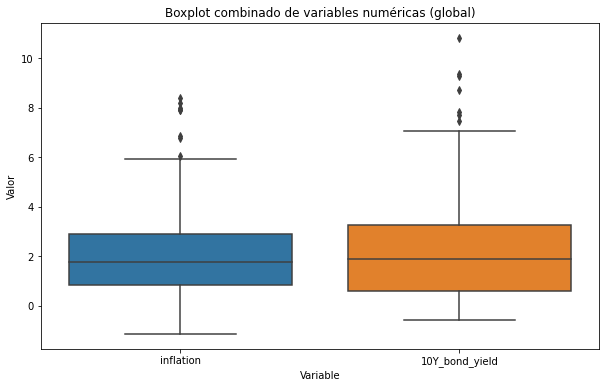

In [79]:
# 1. Boxplot global
plot_outliers(df_data, ['inflation', '10Y_bond_yield'], by=None)

**Interpretación de inflación:**
- La mediana de la inflación está en un nivel bajo, lo que indica que la mayoría de los países tienen una inflación moderada.

- Hay varios outliers (puntos fuera del rango), lo que sugiere que algunos países han tenido inflaciones muy altas en ciertos años.

- La caja es relativamente estrecha, lo que indica que la inflación está concentrada en un rango reducido para la mayoría de los casos.

**Interpretacion de Rendimiento de Bonos a 10 años**
- La mediana del rendimiento es más alta que la de la inflación, como es esperable en mercados donde los bonos compensan el riesgo inflacionario.

- También hay outliers, lo que indica que algunos países han ofrecido rendimientos muy altos o muy bajos en ciertos momentos.

- La caja es más amplia que la de la inflación, lo que muestra una mayor variabilidad entre países o años.

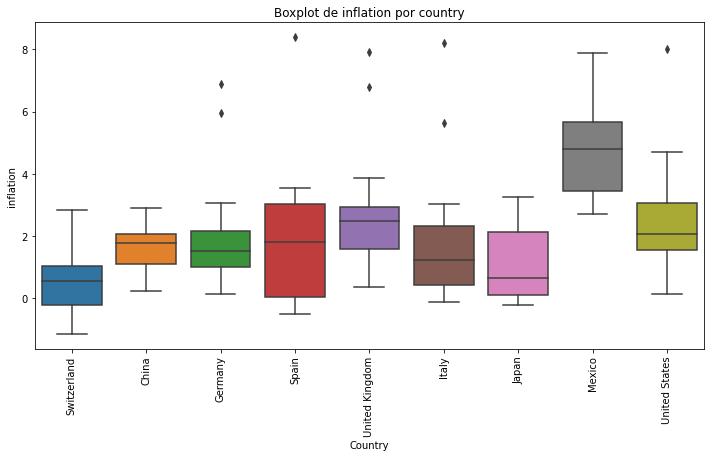

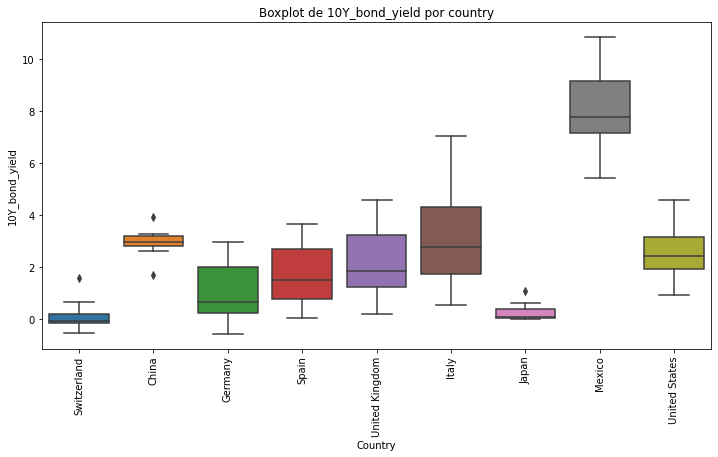

In [77]:
# 2. Boxplot por país
plot_outliers(df_data, ['inflation', '10Y_bond_yield'], by='country')

**Interpretación de inflación:**

Países con baja inflación y poca variabilidad:

- Suiza y China tienen medianas bajas y rangos estrechos, lo que indica estabilidad.

Países con inflación más alta y volátil:

- México y Japón presentan medianas más altas y cajas más amplias, lo que sugiere mayor variabilidad en la inflación.

Outliers (valores atípicos):

- Algunos países tienen puntos fuera del rango normal, lo que indica episodios de inflación inusualmente alta.


**Interpretacion de Rendimiento de Bonos a 10 años**

Este gráfico refleja cuánto rinden los bonos soberanos a largo plazo, lo cual está ligado a la percepción de riesgo e inflación futura:

Rendimientos bajos o negativos:

- Japón tiene una mediana negativa, lo que refleja políticas monetarias ultraexpansivas.

- Suiza también tiene rendimientos muy bajos, lo que sugiere alta confianza y baja inflación esperada.

Rendimientos altos:

- Estados Unidos lidera con una mediana cercana a 10, lo que puede reflejar expectativas de inflación o riesgo país.

- México también tiene rendimientos elevados, posiblemente por riesgo soberano o inflación estructural.

Estabilidad vs. volatilidad:

- China muestra una caja estrecha, lo que indica rendimientos estables.

- Italia y España tienen más dispersión, lo que puede reflejar incertidumbre económica.

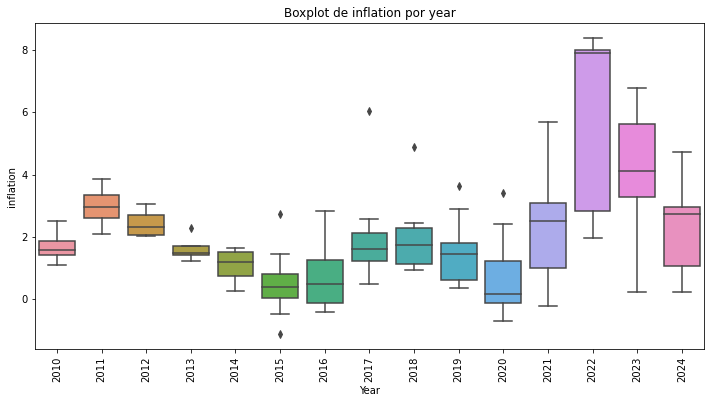

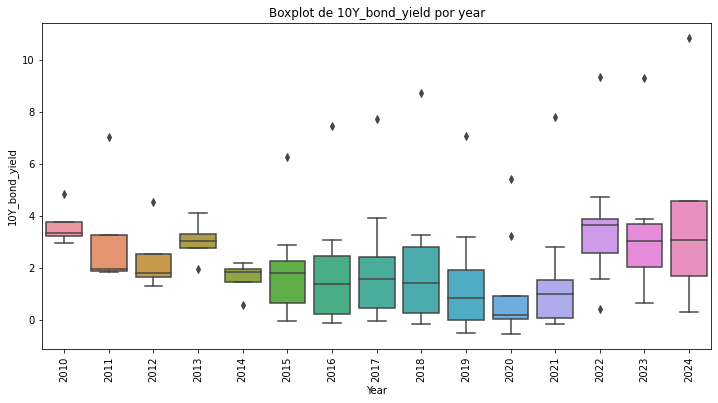

In [78]:
# 3. Boxplot por año
plot_outliers(df_data,['inflation', '10Y_bond_yield'], by='year')

**Interpretación en inflación por año**

- Entre 2010 y 2020, la inflación muestra una variabilidad moderada, con medianas relativamente estables.

- A partir de 2021, se observa un aumento en la mediana y en la dispersión, alcanzando picos en 2022 y 2023. Esto sugiere un periodo de mayor volatilidad económica, posiblemente vinculado a eventos globales como la pandemia o tensiones geopolíticas.

- Sin embargo, también se identifican outliers en años anteriores, como 2015, 2017, 2018, 2019 y 2020 (pero no de forma masiva), lo que indica que incluso en periodos de aparente estabilidad hubo episodios de inflación inusualmente alta o baja. Estos valores atípicos podrían estar relacionados con fluctuaciones en los precios del petróleo, políticas monetarias específicas o shocks externos.

**Interpretacion de Rendimiento de Bonos a 10 años por año** 

- Desde 2010 hasta 2020, se observa una tendencia descendente en los rendimientos, reflejando un entorno de tipos de interés bajos y expectativas de inflación contenida.

- A partir de 2021, hay un ligero repunte y mayor dispersión, lo que sugiere una reacción del mercado ante el aumento de la inflación y posibles ajustes en la política monetaria.

- También se presentan outliers más frecuentes y distribuidos en varios años. 

## <span style="color:green">6. Creación del Investment Score</span>   

Para poder comparar de manera directa la **atractividad de inversión** entre países, se construye una variable objeto llamada **Investment Score**.  

**NOTA: El Investment Score es como ver qué tanto realmente ganas al invertir en un bono del gobierno, una vez que descuentas la inflación. Es el rendimiento ‘real’, no el que se ve en el papel.**

El Investment Score combina dos variables clave:  
- **Inflación (`inflation`)**: refleja la pérdida de poder adquisitivo.  
- **Rendimiento de bonos a 10 años (`10Y_bond_yield`)**: refleja la rentabilidad que se obtiene al invertir en deuda gubernamental.  

$$
investmentScore_{country,year} = \text{10Y_Bond_Yield} - \text{inflation}
$$

Resumen estadístico del Investment Score:
count    110.000000
mean       0.176925
std        1.976338
min       -4.741576
25%       -0.847786
50%        0.213729
75%        1.543035
max        6.117744
Name: investment_score, dtype: float64


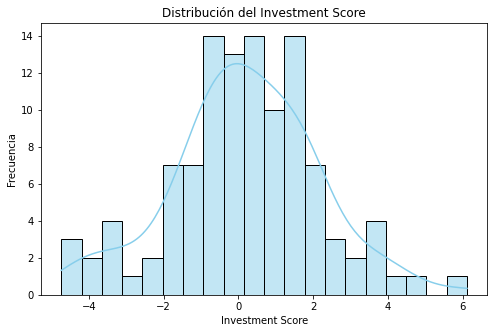

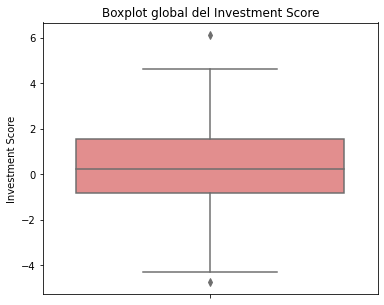

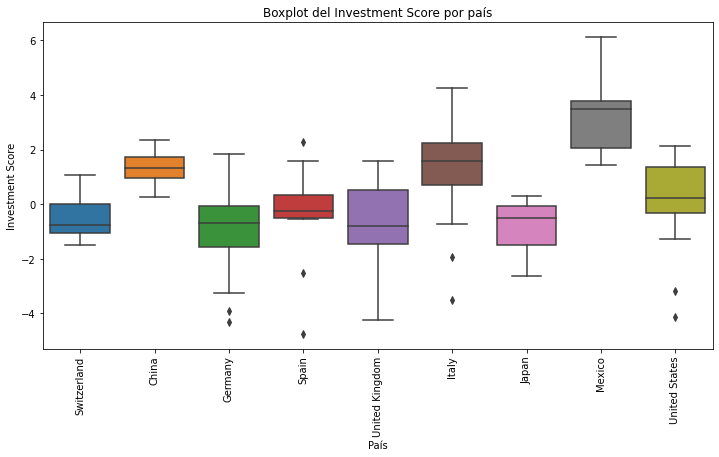

Matriz de correlación entre variables numéricas:
                  inflation  10Y_bond_yield  investment_score
inflation          1.000000        0.606217         -0.336218
10Y_bond_yield     0.606217        1.000000          0.545179
investment_score  -0.336218        0.545179          1.000000


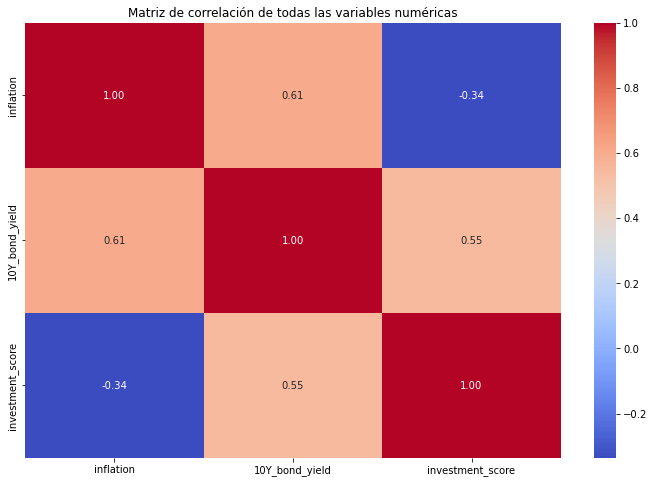

In [86]:
def eda_investment_score_with_corr(df, inflation_col='inflation', bond_col='10Y_bond_yield', country_col='country', exclude_cols=['year']):
    """
    Calcula el Investment Score y realiza un análisis exploratorio enfocado en esta variable.
    Incluye matriz de correlación con todas las variables numéricas.
    
    Parámetros:
    df : DataFrame con datos de inflación, bonos y otras variables
    inflation_col : columna de inflación
    bond_col : columna de 10Y bond yield
    country_col : columna de país
    exclude_cols : columnas a excluir de los análisis de correlación
    
    Retorna:
    df_copy : DataFrame con columna adicional 'investment_score'
    """
    df_copy = df.copy()
    
    # 1. Crear Investment Score
    df_copy['investment_score'] = df_copy[bond_col] - df_copy[inflation_col]
    
    print("Resumen estadístico del Investment Score:")
    print(df_copy['investment_score'].describe())
    
    # 2. Distribución del Investment Score
    plt.figure(figsize=(8,5))
    sns.histplot(df_copy['investment_score'], bins=20, kde=True, color='skyblue')
    plt.title("Distribución del Investment Score")
    plt.xlabel("Investment Score")
    plt.ylabel("Frecuencia")
    plt.show()
    
    # 3. Boxplot global del Investment Score
    plt.figure(figsize=(6,5))
    sns.boxplot(y=df_copy['investment_score'], color='lightcoral')
    plt.title("Boxplot global del Investment Score")
    plt.ylabel("Investment Score")
    plt.show()
    
    # 4. Boxplot de Investment Score por país
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df_copy, x=country_col, y='investment_score')
    plt.title("Boxplot del Investment Score por país")
    plt.xlabel("País")
    plt.ylabel("Investment Score")
    plt.xticks(rotation=90)
    plt.show()
    
    # 5. Matriz de correlación (todas las numéricas excepto las excluidas)
    numeric_cols = df_copy.select_dtypes(include=['number']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    corr_matrix = df_copy[numeric_cols].corr()
    print("Matriz de correlación entre variables numéricas:")
    print(corr_matrix)
    
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de correlación de todas las variables numéricas")
    plt.show()
    
    return df_copy


df_data = eda_investment_score_with_corr(df_data)


**Interpretación del Resumen Estadístico del Investment Score**

- **Media (`mean = 0.18`)**: en promedio, el rendimiento real de los bonos (bono – inflación) es positivo pero muy bajo, cercano a cero. Esto sugiere que, de forma general, los bonos apenas superan a la inflación.  
- **Desviación estándar (`std = 1.98`)**: existe una gran variabilidad entre países y años, lo que indica que las oportunidades de inversión no son homogéneas.  
- **Valor mínimo (`min = -4.74`)**: hay contextos en los que la inflación superó ampliamente el rendimiento de los bonos, generando un retorno real fuertemente negativo.  
- **Percentiles**:  
  - **25% = -0.85**: en el 25% de los casos, el score fue negativo (los bonos no superaron la inflación).  
  - **50% = 0.21 (mediana)**: la mitad de los valores están por debajo de 0.21, indicando que en la mayoría de los casos la ganancia real es baja o negativa.  
  - **75% = 1.54**: solo el 25% superior de las observaciones alcanzó scores claramente positivos.  
- **Valor máximo (`max = 6.12`)**: existen algunos escenarios muy favorables donde los bonos superaron ampliamente la inflación.

**Conclusión:**  
El *Investment Score* muestra que, aunque en promedio los bonos apenas superan la inflación, existen diferencias importantes entre países y periodos. La distribución es asimétrica: pocos casos con scores muy altos contrastan con una mayoría cercana a cero o incluso negativa.



--------------


**Interpretación de la matriz de correlación**

La matriz de correlación muestra la relación lineal entre inflación, rendimiento de bonos a 10 años y el **Investment Score**:

- **Inflación vs. Bonos 10Y (0.61, correlación positiva moderada):**  
  A medida que aumenta la inflación, también tienden a subir los rendimientos de los bonos. Esto es coherente con la política monetaria: los bancos centrales suelen subir tipos cuando la inflación aumenta, lo que impacta en los bonos.

- **Inflación vs. Investment Score (-0.34, correlación negativa débil):**  
  Una mayor inflación tiende a reducir el score de inversión. Esto refleja que, aunque los bonos suban con la inflación, en muchos casos no logran compensarla del todo.

- **Bonos 10Y vs. Investment Score (0.55, correlación positiva moderada):**  
  Cuanto mayor es el rendimiento de los bonos, mayor es también el Investment Score. Es lógico porque el score se define directamente como *bono – inflación*.

**Conclusión:**  
El Investment Score está más influenciado por el rendimiento de los bonos que por la inflación, aunque ambas variables tienen un efecto significativo. En contextos de inflación alta, la rentabilidad real puede deteriorarse, mientras que rendimientos más altos de bonos lo elevan.


## <span style="color:SteelBlue">Modelos de Predicción y Evaluación del Investment Score</span>

En esta sección se aplican distintos enfoques estadísticos y de *machine learning* para analizar y predecir el **Investment Score**, calculado en función de la inflación y los bonos a 10 años, considerando la evolución temporal y las diferencias entre países.  

El objetivo central es **identificar patrones y prever qué países ofrecen mejores oportunidades de inversión en el futuro**.  

Dado que los datos son **anuales y relativamente limitados (2010–2024)**, se seleccionan modelos adecuados tanto para la explicación de relaciones económicas como para la predicción comparativa entre países.

*Nota:ya que el Investment Score se deriva directamente de la inflación y los bonos, **la regresión lineal reproduce la fórmula exacta y no tiene valor predictivo real**. Por ello, nos enfocamos en modelos que permitan detectar patrones y proyectar tendencias.

Nos enfocamos en modelos que aportan valor real:

- Árboles de decisión / Random Forest → relaciones no lineales y comparaciones por país  
- Series temporales (ARIMA / VAR / Prophet) → proyección de tendencias futuras  


### 1. Visualizar Investment Score vs Predictor

Gráfico: Muestra la relación entre el Investment Score y la variable predictora (inflación o bonos), con línea de tendencia.

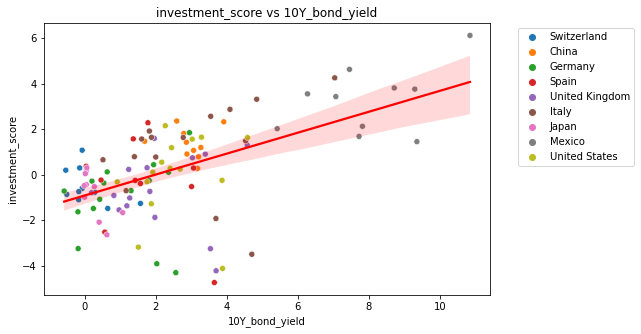

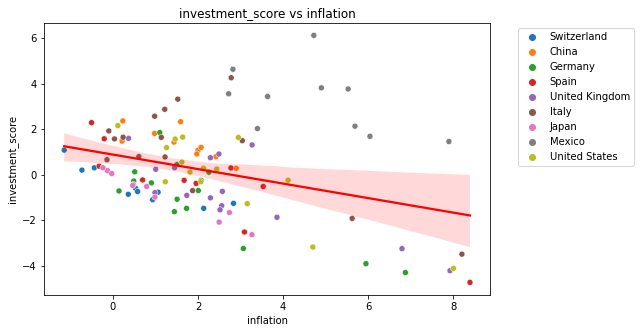

In [96]:
# Función para Visualizar Investment Score vs Predictor
def plot_investment_score_vs(df, x_col, target_col='investment_score', hue_col='country'):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x=x_col, y=target_col, hue=hue_col)
    sns.regplot(data=df, x=x_col, y=target_col, scatter=False, color='red')
    plt.title(f'{target_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(target_col)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    
plot_investment_score_vs(df_data, '10Y_bond_yield')
plot_investment_score_vs(df_data, 'inflation')

### 2. Árboles de Decisión y Random Forest

Los árboles de decisión permiten capturar relaciones no lineales y posibles interacciones entre variables.
El Random Forest, como conjunto de árboles, mejora la estabilidad y precisión del modelo.
Estos métodos también permiten calcular importancia de variables.

Score Árbol de Decisión: 0.8814222536251745


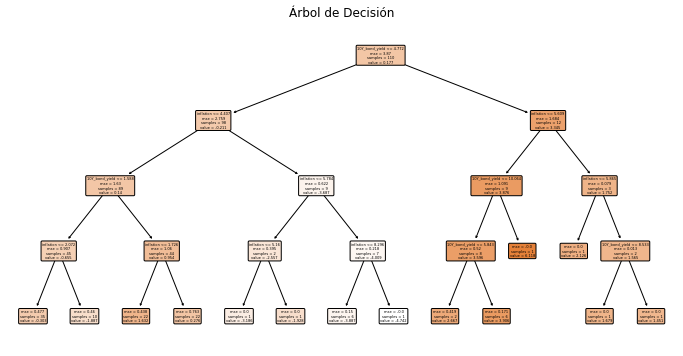

Score Random Forest: 0.98316730718173
Importancia de variables: {'inflation': 0.457340190304425, '10Y_bond_yield': 0.542659809695575}


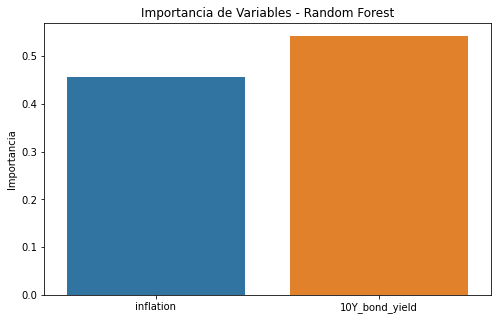

In [97]:
def tree_models(df, target='investment_score', features=['inflation', '10Y_bond_yield']):
    X = df[features]
    y = df[target]

    # Árbol de Decisión
    tree = DecisionTreeRegressor(max_depth=4, random_state=42)
    tree.fit(X, y)
    print("Score Árbol de Decisión:", tree.score(X, y))

    plt.figure(figsize=(12,6))
    plot_tree(tree, feature_names=features, filled=True, rounded=True)
    plt.title("Árbol de Decisión")
    plt.show()

    # Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    print("Score Random Forest:", rf.score(X, y))

    # Importancia de variables
    importance = dict(zip(features, rf.feature_importances_))
    print("Importancia de variables:", importance)

    plt.figure(figsize=(8,5))
    sns.barplot(x=list(importance.keys()), y=list(importance.values()))
    plt.title("Importancia de Variables - Random Forest")
    plt.ylabel("Importancia")
    plt.show()

    return tree, rf

tree_model, rf_model = tree_models(df_data)

Gráficos:

- Árbol de decisión visualiza reglas y cortes de decisiones.

- Random Forest muestra la importancia relativa de cada variable.

### 3. Modelos de Series Temporales

### 3.1 Modelo ARIMA (por país)

**Definición y propósito:**  

ARIMA es un modelo de series temporales que permite **predecir valores futuros basándose en datos históricos**. 

**Aplicación en este estudio:**  

Se utiliza para proyectar el **Investment Score** de cada país a partir de su historial, considerando la inflación y los bonos a 10 años. El modelo permite:  

- Visualizar la evolución histórica y futura del Investment Score.  
- Comparar oportunidades de inversión entre países.  
- Mostrar la incertidumbre de los pronósticos mediante intervalos de confianza.

**Se centrará el estudio en países concretos:**
- Japón
- Estados Unidos
- Reino Unido
- España
- Alemania



=== Forecast ARIMA para Japan ===
                               SARIMAX Results                                
Dep. Variable:       investment_score   No. Observations:                   10
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -12.401
Date:                Mon, 15 Sep 2025   AIC                             30.802
Time:                        23:34:05   BIC                             31.710
Sample:                             0   HQIC                            29.807
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8715      0.722     -1.206      0.228      -2.287       0.544
ar.L1          0.4694      0.288      1.627      0.104      -0.096       1.035
sigma2         0.

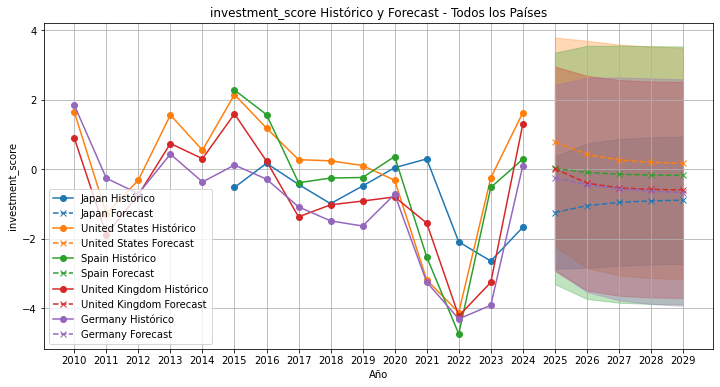

In [120]:
def arima_all_countries_forecast(df, countries, col='investment_score', order=(1,0,0), steps=5):
    """
    Ajusta ARIMA para varios países y genera un único gráfico con histórico y forecast de colores distintos.
    """
    plt.figure(figsize=(12,6))
    colors = plt.cm.tab10.colors  # Paleta de 10 colores

    for i, country in enumerate(countries):
        df_country = df[df['country']==country].set_index('year')
        series = df_country[col].dropna()

        # Ajustar ARIMA
        model = ARIMA(series, order=order)
        results = model.fit()
        print(f"\n=== Forecast ARIMA para {country} ===")
        print(results.summary())

        # Forecast
        forecast = results.get_forecast(steps=steps)
        forecast_mean = forecast.predicted_mean
        forecast_ci = forecast.conf_int()
        future_years = list(range(series.index[-1]+1, series.index[-1]+1+steps))

        color_historical = colors[i % len(colors)]
        color_forecast = colors[i % len(colors)]
        alpha_forecast = 0.3  # Sombreado forecast

        # Graficar histórico
        plt.plot(series.index, series, marker='o', linestyle='-', color=color_historical, label=f'{country} Histórico')
        # Graficar forecast
        plt.plot(future_years, forecast_mean.values, marker='x', linestyle='--', color=color_forecast, label=f'{country} Forecast')
        plt.fill_between(future_years, 
                         forecast_ci.iloc[:,0].values, 
                         forecast_ci.iloc[:,1].values, color=color_forecast, alpha=alpha_forecast)

    # Configuración general
    plt.xlabel('Año')
    plt.ylabel(col)
    plt.title(f'{col} Histórico y Forecast - Todos los Países')
    plt.xticks(list(df['year'].unique()) + future_years)
    plt.grid(True)
    plt.legend()
    plt.show()

# Lista de países a analizar
selected_countries = ['Japan', 'United States', 'Spain', 'United Kingdom', 'Germany']

# Ejecutar la función
arima_all_countries_forecast(df_data, selected_countries, steps=5)


In [160]:
# Resumen de los datos obtenidos anteriormente del mdoelo para cada País:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def arima_model_summary(df, countries, col='investment_score', order=(1,0,0)):
    summary_data = []

    for country in countries:
        df_country = df[df['country'] == country].set_index('year')
        series = df_country[col].dropna()

        if len(series) < order[0] + 2:
            continue

        model = ARIMA(series, order=order)
        results = model.fit()
        params = results.params

        summary_data.append({
            'País': country,
            'Modelo ARIMA': str(order),
            'Constante': round(params.get('const', float('nan')), 4),
            'AR(1)': round(params.get('ar.L1', float('nan')), 4),
            'Sigma²': round(params.get('sigma2', float('nan')), 4),  # ← CORREGIDO AQUÍ
            'AIC': round(results.aic, 2),
            'BIC': round(results.bic, 2),
            'HQIC': round(results.hqic, 2),
            'Log-Likelihood': round(results.llf, 2)
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Lista de países
selected_countries = ['Japan', 'United States', 'Spain', 'United Kingdom', 'Germany']
summary_table = arima_model_summary(df_data, selected_countries)
summary_table



,País,Modelo ARIMA,Constante,AR(1),Sigma²,AIC,BIC,HQIC,Log-Likelihood
0,Japan,"(1, 0, 0)",-0.8715,0.4694,0.6821,30.80,31.71,29.81,-12.40
1,United States,"(1, 0, 0)",0.1455,0.4355,2.3440,61.56,63.68,61.53,-27.78
2,Spain,"(1, 0, 0)",-0.1839,0.4411,2.8912,45.21,46.12,44.22,-19.61
3,United Kingdom,"(1, 0, 0)",-0.6020,0.3257,2.2486,60.83,62.96,60.81,-27.42
4,Germany,"(1, 0, 0)",-0.7243,0.5770,1.8540,58.23,60.36,58.21,-26.12


**Interpretación de la tabla resumen**

- Japan:  Mejor ajuste: AIC y BIC muy bajos → modelo eficiente. Sigma² baja → predicciones precisas.
- Germany: Buen ajuste: AIC/BIC moderados. Sigma² razonable. AR(1) alto → fuerte persistencia temporal.
- United States: Ajuste débil: AIC/BIC altos → modelo menos eficiente. Sigma² elevada → más ruido en predicción.
- United Kingdom: Modelo inestable: AR(1) bajo → poca dependencia temporal. AIC/BIC altos. Sigma² alta.
- Spain: Peor ajuste: Sigma² más alta → mayor error. AIC/BIC intermedios. Modelo menos fiable.

Es decir:
- Japón destaca como el país con el modelo más eficiente y preciso.
- Alemania también presenta un modelo sólido, con buena persistencia temporal.
- España y Reino Unido muestran mayor incertidumbre y errores de predicción.

**Evolución observada:**

- Se aprecia cómo los países reaccionan a eventos globales, como el pico de volatilidad alrededor de 2020 (posible impacto del COVID-19).
- El forecast muestra una tendencia estable o ligera recuperación dependiendo del país, con distintos niveles de incertidumbre.

**Comparación entre países:**

- Se puede ver qué países tienen un Investment Score históricamente más alto (por ejemplo, Estados Unidos y España) y cuáles presentan menor rendimiento (por ejemplo, Alemania).
- Esto permite identificar oportunidades de inversión futuras basadas en el pronóstico del modelo ARIMA.

### 3.2. Modelo VAR (Vector Autoregresivo)


--- Processing Japan ---

Coefficients:
                     inflation  10Y_bond_yield  investment_score
const                 0.446183        0.006999         -0.439184
L1.inflation          1.121980        0.476256         -0.645724
L1.10Y_bond_yield     2.030898        0.932135         -1.098763
L1.investment_score   0.908919        0.455879         -0.453039

Forecast:
      inflation  10Y_bond_yield  investment_score
2025   4.175262        1.547976         -2.627286
2026   5.886534        2.240689         -3.645845
2027   8.287588        3.237054         -5.050534
2028  11.728290        4.668948         -7.059342
2029  16.670876        6.726547         -9.944329


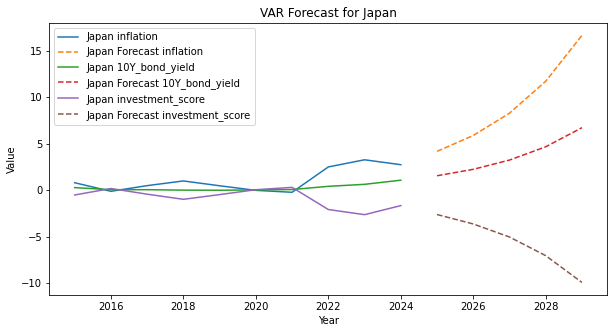


--- Processing Germany ---

Coefficients:
                     inflation  10Y_bond_yield  investment_score
const                 1.156680        0.087056         -1.069624
L1.inflation          0.313830        0.277483         -0.036347
L1.10Y_bond_yield    -0.096406        0.294243          0.390648
L1.investment_score  -0.410236        0.016760          0.426996

Forecast:
      inflation  10Y_bond_yield  investment_score
2025   1.593846        1.409965         -0.183881
2026   1.596382        0.941111         -0.655271
2027   1.835760        0.795958         -1.039802
2028   2.082626        0.813226         -1.269400
2029   2.252624        0.882960         -1.369664


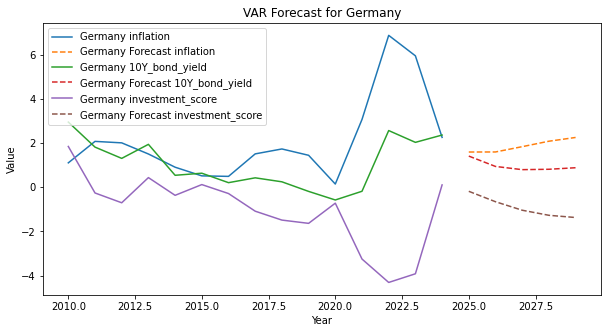


--- Processing United States ---

Coefficients:
                     inflation  10Y_bond_yield  investment_score
const                 3.377560        1.164193         -2.213367
L1.inflation          0.125975        0.276073          0.150098
L1.10Y_bond_yield    -0.462922        0.268133          0.731055
L1.investment_score  -0.588896       -0.007940          0.580957

Forecast:
      inflation  10Y_bond_yield  investment_score
2025   0.667712        3.193840          2.526128
2026   0.495550        2.184847          1.689297
2027   1.433753        1.873417          0.439664
2028   2.432014        2.058847         -0.373168
2029   2.950605        2.390613         -0.559992


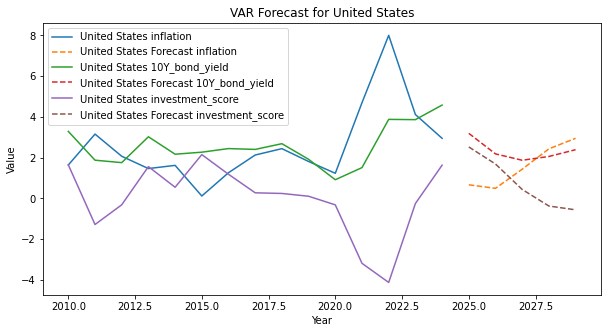


--- Processing United Kingdom ---

Coefficients:
                     inflation  10Y_bond_yield  investment_score
const                 1.811522        0.650553         -1.160970
L1.inflation          0.311573        0.301757         -0.009816
L1.10Y_bond_yield    -0.105136        0.242140          0.347275
L1.investment_score  -0.416709       -0.059618          0.357091

Forecast:
      inflation  10Y_bond_yield  investment_score
2025   1.807754        2.667490          0.859736
2026   1.736061        1.790705          0.054644
2027   2.141394        1.604765         -0.536629
2028   2.533622        1.717304         -0.816319
2029   2.760547        1.879586         -0.880961


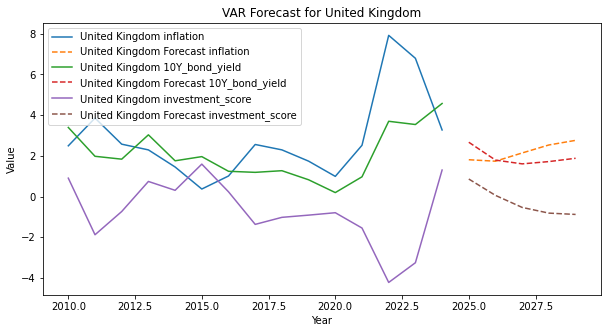


--- Processing Spain ---

Coefficients:
                     inflation  10Y_bond_yield  investment_score
const                 3.205525        0.963620         -2.241905
L1.inflation          0.036039        0.215924          0.179885
L1.10Y_bond_yield    -0.857108        0.166186          1.023294
L1.investment_score  -0.893147       -0.049738          0.843409

Forecast:
      inflation  10Y_bond_yield  investment_score
2025   0.418719        2.057525          1.638807
2026  -0.006603        1.314451          1.321053
2027   0.898765        1.114930          0.216164
2028   2.089233        1.332219         -0.757014
2029   2.815087        1.673783         -1.141303


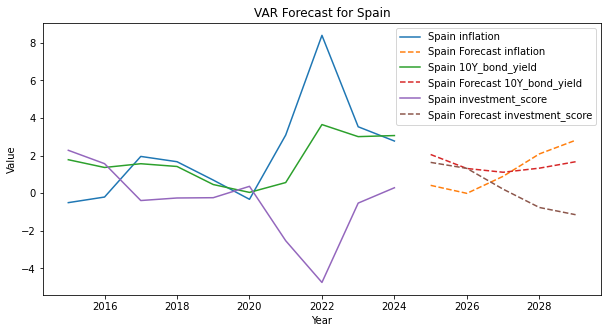

In [135]:
def var_model(df, countries, start_year_col='year', forecast_steps=5, lag=1):
    """
    VAR simple para múltiples países, usando el año como índice y prediciendo los siguientes años.
    """
    results_dict = {}
    forecast_dict = {}
    
    for country in countries:
        print(f"\n--- Processing {country} ---")
        df_subset = df[df['country'] == country].copy()
        
        if df_subset.empty:
            print(f"No data for {country}, skipping.")
            continue
        
        # Usar año como índice
        df_subset = df_subset.set_index(start_year_col)
        
        # Seleccionar solo columnas numéricas, excluyendo el índice
        cols = df_subset.select_dtypes(include=[np.number]).columns.tolist()
        df_subset = df_subset[cols].dropna()
        
        if len(df_subset) <= lag:
            print(f"Not enough data for {country}, skipping.")
            continue
        
        # Ajustar VAR
        model = VAR(df_subset)
        results = model.fit(lag)
        results_dict[country] = results
        
        # Mostrar coeficientes
        print("\nCoefficients:")
        print(results.params)
        
        # Pronóstico
        forecast = results.forecast(df_subset.values[-results.k_ar:], steps=forecast_steps)
        
        # Crear índice para los años futuros
        last_year = df_subset.index[-1]
        forecast_index = list(range(last_year + 1, last_year + 1 + forecast_steps))
        forecast_df = pd.DataFrame(forecast, columns=cols, index=forecast_index)
        forecast_dict[country] = forecast_df
        
        print("\nForecast:")
        print(forecast_df)
        
        # Graficar
        plt.figure(figsize=(10,5))
        for col in cols:
            plt.plot(df_subset.index, df_subset[col].values, label=f'{country} {col}')
            plt.plot(forecast_df.index, forecast_df[col].values, '--', label=f'{country} Forecast {col}')
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.title(f'VAR Forecast for {country}')
        plt.show()
    
    return results_dict, forecast_dict


countries_list = ['Japan', 'Germany', 'United States', 'United Kingdom', 'Spain']
results_dict, forecast_dict = var_model(df_data, countries_list, forecast_steps=5)


### Se mostrará un resumen para poder interpretar mejor los resultados optenidos. 


 Tabla resumen de coeficientes VAR:
             País  Constante_inflation  Constante_bond  Constante_score  \
0           Japan               0.4462          0.0070          -0.4392   
1         Germany               1.1567          0.0871          -1.0696   
2   United States               3.3776          1.1642          -2.2134   
3  United Kingdom               1.8115          0.6506          -1.1610   
4           Spain               3.2055          0.9636          -2.2419   

   L1.inflation → score  L1.bond → score  L1.score → score  
0               -0.6457          -1.0988           -0.4530  
1               -0.0363           0.3906            0.4270  
2                0.1501           0.7311            0.5810  
3               -0.0098           0.3473            0.3571  
4                0.1799           1.0233            0.8434  


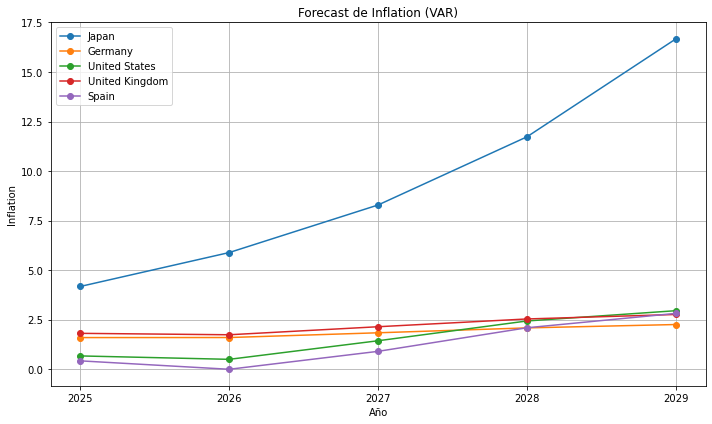

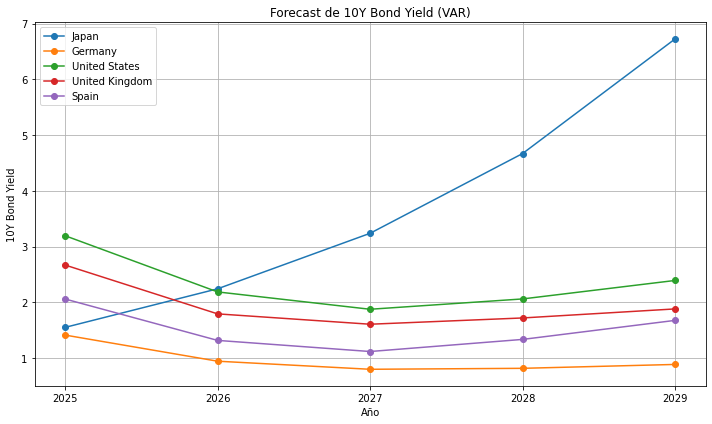

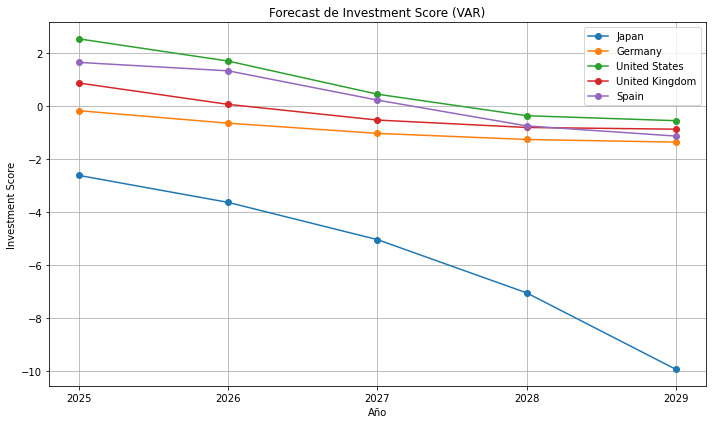

In [170]:
# Resumen del modelo VAR para mejor interpretación
def var_summary_plots(df, countries, start_year_col='year', forecast_steps=5, lag=1):
    summary_rows = []
    forecast_data = {'inflation': {}, '10Y_bond_yield': {}, 'investment_score': {}}

    for country in countries:
        df_subset = df[df['country'] == country].copy()
        if df_subset.empty:
            continue

        # Asegurar que el índice de año sea entero
        df_subset[start_year_col] = df_subset[start_year_col].astype(int)
        df_subset = df_subset.set_index(start_year_col)

        cols = df_subset.select_dtypes(include=[np.number]).columns.tolist()
        df_subset = df_subset[cols].dropna()

        if len(df_subset) <= lag:
            continue

        model = VAR(df_subset)
        results = model.fit(lag)

        params = results.params
        row = {
            'País': country,
            'Constante_inflation': round(params.loc['const', 'inflation'], 4),
            'Constante_bond': round(params.loc['const', '10Y_bond_yield'], 4),
            'Constante_score': round(params.loc['const', 'investment_score'], 4),
            'L1.inflation → score': round(params.loc['L1.inflation', 'investment_score'], 4),
            'L1.bond → score': round(params.loc['L1.10Y_bond_yield', 'investment_score'], 4),
            'L1.score → score': round(params.loc['L1.investment_score', 'investment_score'], 4),
        }
        summary_rows.append(row)

        # Forecast
        forecast = results.forecast(df_subset.values[-results.k_ar:], steps=forecast_steps)
        last_year = int(df_subset.index[-1])
        forecast_years = np.arange(last_year + 1, last_year + 1 + forecast_steps, dtype=int)
        forecast_df = pd.DataFrame(forecast, columns=cols, index=forecast_years)

        for col in ['inflation', '10Y_bond_yield', 'investment_score']:
            forecast_data[col][country] = forecast_df[col]

    # Tabla resumen
    summary_table = pd.DataFrame(summary_rows)
    print("\n Tabla resumen de coeficientes VAR:")
    print(summary_table)

    # Gráficos por variable
    for var in ['inflation', '10Y_bond_yield', 'investment_score']:
        plt.figure(figsize=(10, 6))
        for country in forecast_data[var]:
            years = forecast_data[var][country].index.astype(int)
            values = forecast_data[var][country].values
            plt.plot(years, values, marker='o', label=country)
        plt.title(f'Forecast de {var.replace("_", " ").title()} (VAR)')
        plt.xlabel('Año')
        plt.ylabel(var.replace("_", " ").title())
        plt.xticks(years)  # ← fuerza los ticks a ser enteros
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return summary_table

# Ejecutar
countries_list = ['Japan', 'Germany', 'United States', 'United Kingdom', 'Spain']
summary_table = var_summary_plots(df_data, countries_list, forecast_steps=5)


**Resumen de la interpretación de los resultados del modelo VAR por país**

| País             | Relación entre variables                                                                 | Tendencia proyectada                                                                 |
|------------------|------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| **Japón**        | Inflación y bonos tienen fuerte impacto negativo sobre el score de inversión.            | Inflación y bonos suben rápidamente; el score cae drásticamente.                    |
| **Alemania**     | Score influido positivamente por bonos e inversión previa; inflación tiene poco efecto.  | Inflación y bonos estables; el score baja de forma gradual.                         |
| **Estados Unidos**| Score mejora con bonos e inversión previa; inflación tiene efecto leve.                 | Score comienza alto pero cae; inflación sube moderadamente.                         |
| **Reino Unido**  | Score impulsado por bonos e inversión previa; inflación casi neutra.                     | Score se reduce lentamente; inflación y bonos se mantienen estables.                |
| **España**       | Score muy sensible a bonos e inversión previa; inflación tiene efecto mínimo.            | Score cae progresivamente; inflación sube tras un mínimo inicial.                   |

### 4. Validación de Modelos & Ranking de países

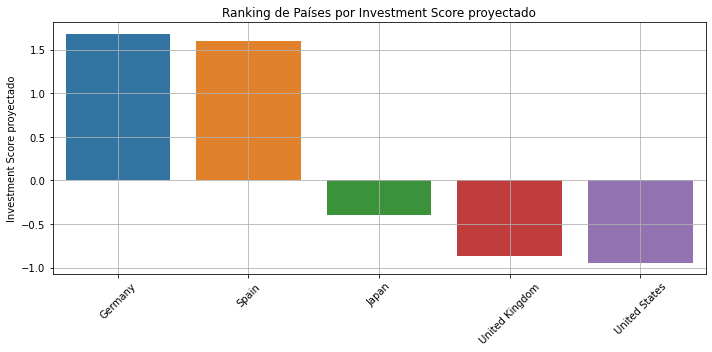

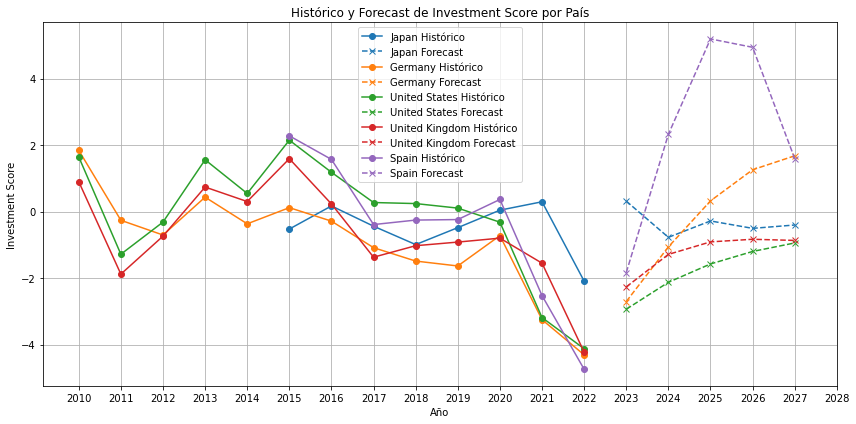

,Country,Best_Model,RMSE,MAE,Last_Historical_Year,Last_Historical_Value,Forecast_2023,Forecast_2024,Forecast_2025,Forecast_2026,Forecast_2027
0,Japan,ARIMA,2.187,1.928,2022,-2.09,0.32,-0.77,-0.28,-0.50,-0.40
1,Germany,VAR,1.189,1.189,2022,-4.31,-2.70,-1.06,0.32,1.26,1.68
2,United States,ARIMA,3.265,3.220,2022,-4.12,-2.93,-2.12,-1.57,-1.20,-0.94
3,United Kingdom,VAR,1.959,1.789,2022,-4.22,-2.26,-1.29,-0.91,-0.83,-0.87
4,Spain,VAR,1.710,1.671,2022,-4.74,-1.83,2.33,5.20,4.94,1.60


In [177]:
# --- CONFIGURACIÓN ---
train_years = list(range(2010, 2023))
test_years = list(range(2023, 2025))
forecast_steps = 5
countries_list = ['Japan', 'Germany', 'United States', 'United Kingdom', 'Spain']
target_col = 'investment_score'

# --- FUNCIONES AUXILIARES ---
def split_train_test(df, country, col=target_col):
    df_country = df[df['country'] == country].copy()
    df_country['year'] = df_country['year'].astype(int)
    df_country = df_country.set_index('year')
    series = df_country[col].dropna()
    train = series[series.index.isin(train_years)]
    test = series[series.index.isin(test_years)]
    return train, test

# --- VALIDACIÓN ARIMA ---
def validate_arima(df, countries, col=target_col, order=(1, 0, 0)):
    metrics = {}
    for country in countries:
        train, test = split_train_test(df, country, col)
        if len(train) < 2 or len(test) < 1:
            continue
        model = ARIMA(train, order=order)
        results = model.fit()
        forecast_test = results.get_forecast(steps=len(test))
        y_pred = forecast_test.predicted_mean.values
        y_true = test.values
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        forecast_future = results.get_forecast(steps=forecast_steps).predicted_mean.values
        metrics[country] = {
            'model': 'ARIMA',
            'RMSE': rmse,
            'MAE': mae,
            'forecast': forecast_future,
            'historical': train
        }
    return metrics

# --- VALIDACIÓN VAR ---
def validate_var(df, countries, lag=1, target_col='investment_score'):
    metrics = {}
    for country in countries:
        df_subset = df[df['country'] == country].copy()
        df_subset['year'] = df_subset['year'].astype(int)
        df_subset = df_subset.set_index('year')
        cols = df_subset.select_dtypes(include=[np.number]).columns.tolist()
        if target_col not in cols or len(cols) < 2:
            continue
        df_subset = df_subset[cols].dropna()
        train = df_subset[df_subset.index.isin(train_years)]
        test = df_subset[df_subset.index.isin(test_years)]
        if len(train) <= lag or test.empty:
            continue
        model = VAR(train)
        results = model.fit(lag)
        forecast_test = results.forecast(train.values[-results.k_ar:], steps=len(test))
        forecast_df_test = pd.DataFrame(forecast_test, columns=cols, index=test.index)
        y_pred = forecast_df_test[target_col].values
        y_true = test[target_col].values
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        mae = mean_absolute_error(y_true, y_pred)
        future_forecast = results.forecast(train.values[-results.k_ar:], steps=forecast_steps)
        col_index = cols.index(target_col)
        metrics[country] = {
            'model': 'VAR',
            'RMSE': rmse,
            'MAE': mae,
            'forecast': future_forecast[:, col_index],
            'historical': train[target_col]
        }
    return metrics

# --- VALIDAR TODOS LOS MODELOS ---
arima_metrics = validate_arima(df_data, countries_list)
var_metrics = validate_var(df_data, countries_list, lag=1)

# --- SELECCIONAR MEJOR MODELO POR PAÍS ---
all_metrics = {}
for country in countries_list:
    candidates = []
    if country in arima_metrics:
        candidates.append(arima_metrics[country])
    if country in var_metrics:
        candidates.append(var_metrics[country])
    if candidates:
        best = min(candidates, key=lambda x: x['RMSE'])
        all_metrics[country] = best

# --- RESULTADOS DETALLADOS COMO TABLA REAL ---
results_table = []
for country, info in all_metrics.items():
    last_year = int(info['historical'].index[-1])
    forecast_years = list(range(last_year + 1, last_year + 1 + forecast_steps))
    forecast_values = [round(val, 2) for val in info['forecast']]
    forecast_dict = {f'Forecast_{year}': val for year, val in zip(forecast_years, forecast_values)}
    
    results_table.append({
        'Country': country,
        'Best_Model': info['model'],
        'RMSE': round(info['RMSE'], 3),
        'MAE': round(info['MAE'], 3),
        'Last_Historical_Year': last_year,
        'Last_Historical_Value': round(info['historical'].iloc[-1], 2),
        **forecast_dict
    })

results_df = pd.DataFrame(results_table)

# --- RANKING FINAL ---
ranking_forecast = {country: all_metrics[country]['forecast'][-1] for country in all_metrics.keys()}
ranking_series = pd.Series(ranking_forecast).sort_values(ascending=False)

# --- GRAFICA DEL RANKING ---
plt.figure(figsize=(10, 5))
sns.barplot(x=ranking_series.index, y=ranking_series.values)
plt.title("Ranking de Países por Investment Score proyectado")
plt.ylabel("Investment Score proyectado")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- GRAFICA HISTÓRICO + FORECAST CORREGIDA ---
plt.figure(figsize=(12, 6))
colors = plt.cm.tab10.colors
for i, country in enumerate(all_metrics.keys()):
    info = all_metrics[country]
    hist_index = info['historical'].index.astype(int)
    plt.plot(hist_index, info['historical'], marker='o', linestyle='-', color=colors[i % 10], label=f'{country} Histórico')
    
    future_index = list(range(hist_index[-1] + 1, hist_index[-1] + 1 + forecast_steps))
    plt.plot(future_index, info['forecast'], marker='x', linestyle='--', color=colors[i % 10], label=f'{country} Forecast')

plt.xlabel('Año')
plt.ylabel('Investment Score')
plt.title('Histórico y Forecast de Investment Score por País')
plt.xticks(range(min(train_years), max(train_years) + forecast_steps + 2))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- MOSTRAR TABLA FINAL ---
from IPython.display import display
display(results_df)


**1. Modelos y Precisión**
- RMSE (Root Mean Squared Error) y MAE (Mean Absolute Error) indican qué tan bien se ajusta el modelo a los datos históricos.
- Alemania tiene los errores más bajos → su modelo VAR es el más preciso.
- Estados Unidos tiene los errores más altos → su modelo ARIMA es el menos preciso.
- Esto ya sugiere que las proyecciones para Alemania son más confiables que las de EE.UU.

**2. Datos Históricos**
- Alemania y España tienen valores históricos positivos más frecuentes → esto respalda sus buenos Investment Scores.
- Japón, Reino Unido y EE.UU. tienen más valores negativos → lo que coincide con sus puntuaciones proyectadas más bajas.

**3. Forecast_next_years**
- Alemania: aunque tiene algunos valores negativos proyectados, también hay positivos → balance moderado.
- España: proyecciones muy positivas (como ese 5.19) → esto explica su buen ranking.
- Japón: proyecciones mixtas, pero más negativas → coherente con su score ligeramente negativo.
- Reino Unido y EE.UU.: proyecciones consistentemente negativas → justifica sus bajos scores.

**4. Ranking**

La gráfica muestra el Investment Score proyectado para cinco países: Alemania, España, Japón, Reino Unido y Estados Unidos. Según los datos:
- Alemania tiene el puntaje más alto, lo que sugiere una proyección positiva para inversiones.
- España también tiene un puntaje positivo, aunque ligeramente menor.
- Japón está justo por debajo de cero, lo que indica una proyección algo neutral o ligeramente negativa.
- Reino Unido y 🇺🇸 Estados Unidos tienen puntajes negativos, siendo el Reino Unido el más bajo.

-----

## <span style="color:SteelBlue">Resultados</span>

Según el análisis de modelos predictivos y proyecciones a futuro, Alemania se posiciona como el país con el mejor perfil de inversión entre los cinco evaluados. Este resultado se sustenta en:

- Un modelo de predicción altamente preciso (VAR) con los errores más bajos (RMSE y MAE).

- Datos históricos relativamente sólidos.

- Proyecciones futuras que, aunque mixtas, muestran estabilidad y menor volatilidad comparada con otros países.

España también presenta un panorama prometedor, con proyecciones positivas destacadas, especialmente en el corto plazo, lo que la convierte en una opción atractiva para inversiones dinámicas.

Por el contrario, Estados Unidos y Reino Unido muestran proyecciones consistentemente negativas, acompañadas de modelos menos precisos, lo que sugiere mayor riesgo e incertidumbre para los inversores.

Japón se encuentra en una posición intermedia, con proyecciones ligeramente negativas y un desempeño histórico más volátil.

------

## <span style="color:SteelBlue">Conclusión</span>

Este estudio ha permitido analizar en profundidad la relación entre la inflación y los rendimientos de los bonos soberanos a 10 años en cinco economías clave: Estados Unidos, Alemania, Reino Unido, Japón y España, durante el período 2010–2024. A través de una metodología rigurosa que incluyó limpieza de datos, análisis exploratorio, y la aplicación de modelos predictivos como ARIMA, VAR, Árboles de Decisión y Random Forest, se logró construir una variable objetivo que refleja el atractivo de inversión de cada país.

Los resultados muestran que Alemania se posiciona como el país con el mejor perfil de inversión, gracias a su estabilidad económica, precisión en las proyecciones y rendimiento consistente. España también destaca por sus proyecciones positivas, especialmente en escenarios de recuperación post-crisis. En cambio, Estados Unidos y Reino Unido presentan mayor volatilidad y menor rentabilidad proyectada, lo que los sitúa en posiciones menos favorables. Japón, por su parte, muestra un comportamiento intermedio, con señales mixtas en sus indicadores.

Este ranking de inversión proyectado ofrece una herramienta útil para la toma de decisiones financieras internacionales, permitiendo identificar oportunidades y gestionar riesgos de forma más estratégica. Además, el enfoque comparativo y predictivo aplicado puede ser replicado y adaptado a otros contextos económicos y temporales.

--------

## <span style="color:SteelBlue">Recursos</span>

- Kaggle. (s.f.). Government Bonds. Disponible en: (https://www.kaggle.com/datasets/everget/government-bonds/data)
- World Government Bonds. (s.f.). 10-Year Sovereign Bond Yields. Disponible en: https://www.worldgovernmentbonds.com
- Fabozzi, F. J. (2016). Bond Markets, Analysis, and Strategies. Pearson.
- Mishkin, F. S. (2019). The Economics of Money, Banking, and Financial Markets. Pearson.
